In [57]:
import numpy as np
import pandas as pd
import arviz as az
import pymc3 as pm
import matplotlib.pyplot as plt

### load and split data into 2 dfs

In [58]:
df = pd.read_csv('/Users/Alby/Desktop/rethinking statistics/Rethinking/Data/Howell1.csv', 
                 sep = ';')
print(df.shape)
df.dropna() 
#standardize age
df['age_s'] = ( df['age'] - df['age'].mean() ) / df.age.std()
#print(df.age) ; print(df.age_s) ; print(df.age.mean())

#split into two equally sized dataframes 
df1 = df.copy().iloc[0:272]
df2 = df.copy().iloc[272:544]
print(df1.shape)
print(df2.shape)
print(df1.columns)

(544, 4)
(272, 5)
(272, 5)
Index(['height', 'weight', 'age', 'male', 'age_s'], dtype='object')


### Find starting values for alpha (mean of height) and sigma (variance of height) 

In [59]:
sigma_start = df.height.std() 
alpha_start = df.height.mean() 
print(alpha_start) ; print(sigma_start)

138.2635963235294
27.602447640564694


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, alpha1, sigma1]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:03<00:00, 3920.28draws/s]
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a37faec90>,
      dtype=object)

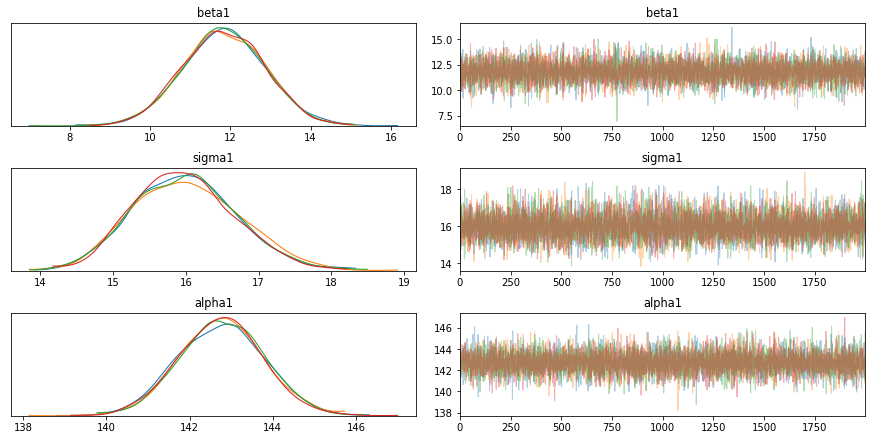

In [60]:
model1 = pm.Model() 

with model1 : 
    sigma = pm.HalfCauchy('sigma1', beta = 10, testval = sigma_start)
    alpha = pm.Normal('alpha1', mu = 140, sigma = 10, testval = alpha_start)
    beta = pm.Normal('beta1', mu = 0, sigma = 5)
    mu = pm.Deterministic('mu1', alpha + beta*df1.age_s)     
    height = pm.Normal('height1', mu = mu, sigma = sigma, observed = df1['height'])
    trace1 = pm.sample(2000, tune = 1000)

varnames = ['beta1', 'sigma1', 'alpha1']
az.plot_trace(trace1, varnames) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, alpha1, sigma1]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:03<00:00, 3113.89draws/s]
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ca21090>,
      dtype=object)

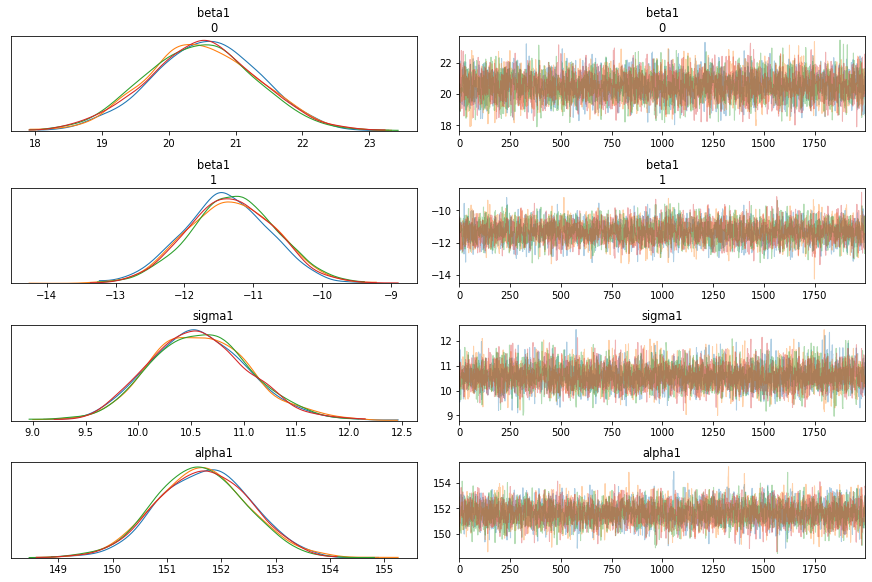

In [44]:
model12 = pm.Model() 

with model12 : 
    sigma = pm.HalfCauchy('sigma1', beta = 10, testval = sigma_start)
    alpha = pm.Normal('alpha1', mu = 140, sigma = 10, testval = alpha_start)
    beta = pm.Normal('beta1', mu = 0, sigma = 5, shape = 2)
    mu = pm.Deterministic('mu1', alpha + beta[0]*df1.age_s + beta[1] * df1.age_s**2)     
    height = pm.Normal('height1', mu = mu, sigma = sigma, observed = df1['height'])
    trace12 = pm.sample(2000, tune = 1000)
    
az.plot_trace(trace12, varnames)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, alpha1, sigma1]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:07<00:00, 1612.94draws/s]
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30b1fd90>,
      dtype=object)

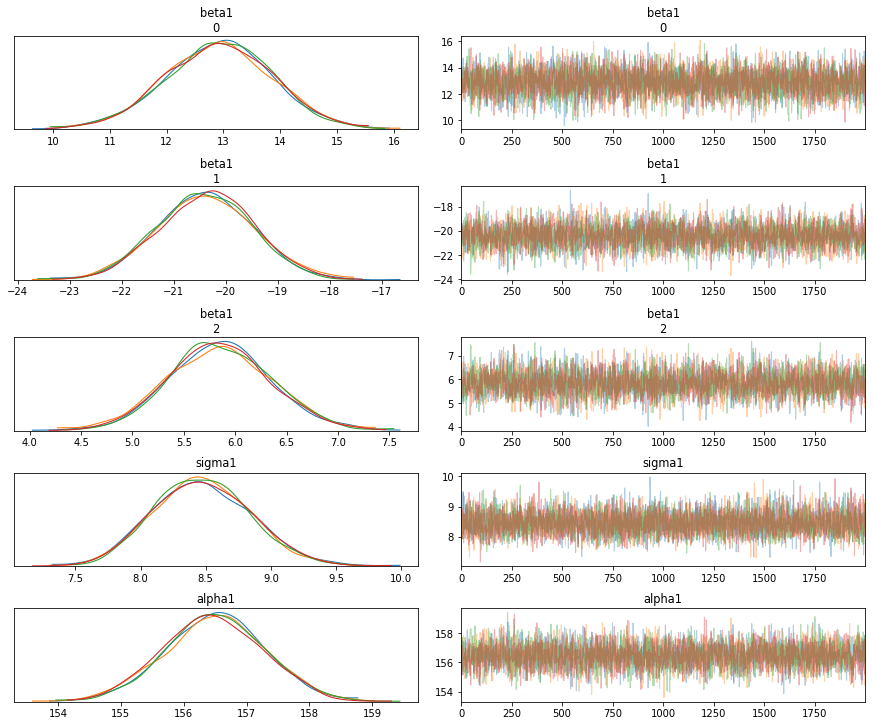

In [46]:
model13 = pm.Model() 
with model13 : 
    sigma = pm.HalfCauchy('sigma1', beta = 10, testval = sigma_start)
    alpha = pm.Normal('alpha1', mu = 140, sigma = 10, testval = alpha_start)
    beta = pm.Normal('beta1', mu = 0, sigma = 5, shape = 3)
    mu = pm.Deterministic('mu1', alpha + beta[0]*df1.age_s + beta[1] * df1.age_s**2 + 
                         beta[2]*df1.age_s**3)     
    height = pm.Normal('height1', mu = mu, sigma = sigma, observed = df1['height'])
    trace13 = pm.sample(2000, tune = 1000)
    
az.plot_trace(trace13, varnames)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, alpha1, sigma1]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:13<00:00, 894.48draws/s]
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "A

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a35692c10>,
      dtype=object)

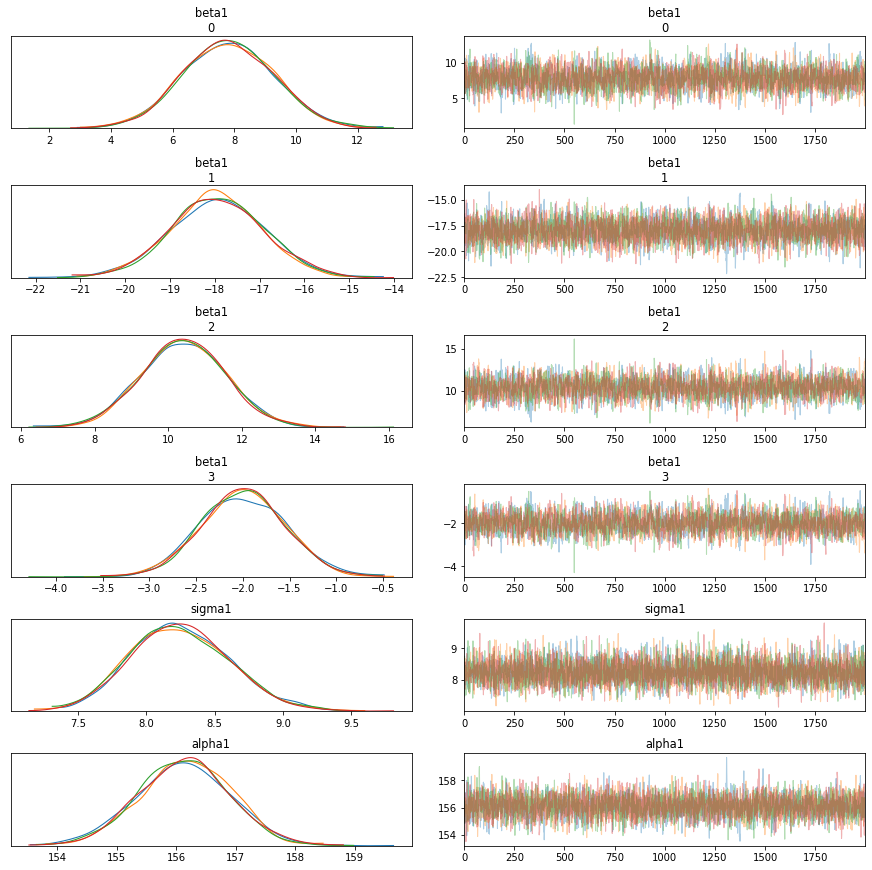

In [47]:
model14 = pm.Model() 

with model14 : 
    sigma = pm.HalfCauchy('sigma1', beta = 10, testval = sigma_start)
    alpha = pm.Normal('alpha1', mu = 140, sigma = 10, testval = alpha_start)
    beta = pm.Normal('beta1', mu = 0, sigma = 5, shape = 4)
    mu = pm.Deterministic('mu1', alpha + beta[0]*df1.age_s + beta[1] * df1.age_s**2 + 
                         beta[2]*df1.age_s**3 + beta[3] * df1.age_s**4)     
    height = pm.Normal('height1', mu = mu, sigma = sigma, observed = df1['height'])
    trace14 = pm.sample(2000, tune = 1000)
    
az.plot_trace(trace14, varnames) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, alpha1, sigma1]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:33<00:00, 355.82draws/s]
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "A

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30a2f850>,
      dtype=object)

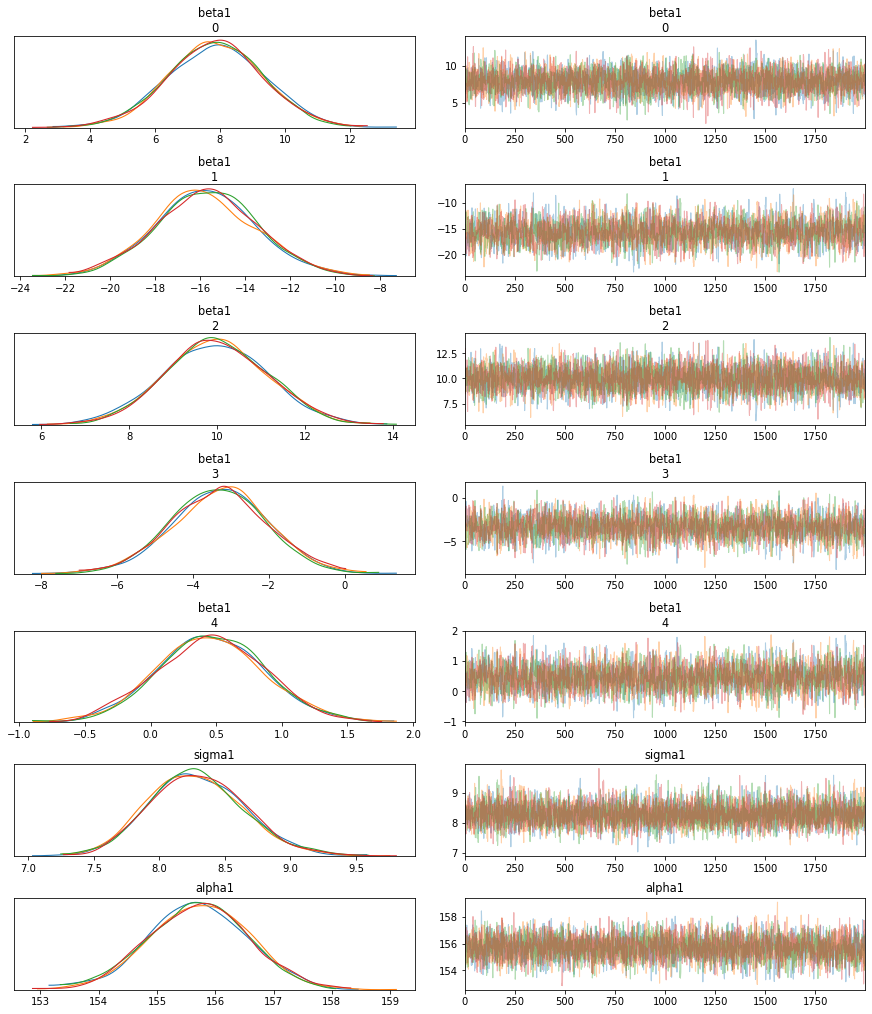

In [49]:
model15 = pm.Model() 

with model15 : 
    sigma = pm.HalfCauchy('sigma1', beta = 10, testval = sigma_start)
    alpha = pm.Normal('alpha1', mu = 140, sigma = 10, testval = alpha_start)
    beta = pm.Normal('beta1', mu = 0, sigma = 5, shape = 5)
    mu = pm.Deterministic('mu1', alpha + beta[0]*df1.age_s + beta[1] * df1.age_s**2 + 
                         beta[2]*df1.age_s**3 + beta[3] * df1.age_s**4 + beta[4] * df1.age_s**5)     
    height = pm.Normal('height1', mu = mu, sigma = sigma, observed = df1['height'])
    trace15 = pm.sample(2000, tune = 1000)
    
az.plot_trace(trace15, varnames) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, alpha1, sigma1]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [01:14<00:00, 161.90draws/s]
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "A

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3e49b5d0>,
      dtype=object)

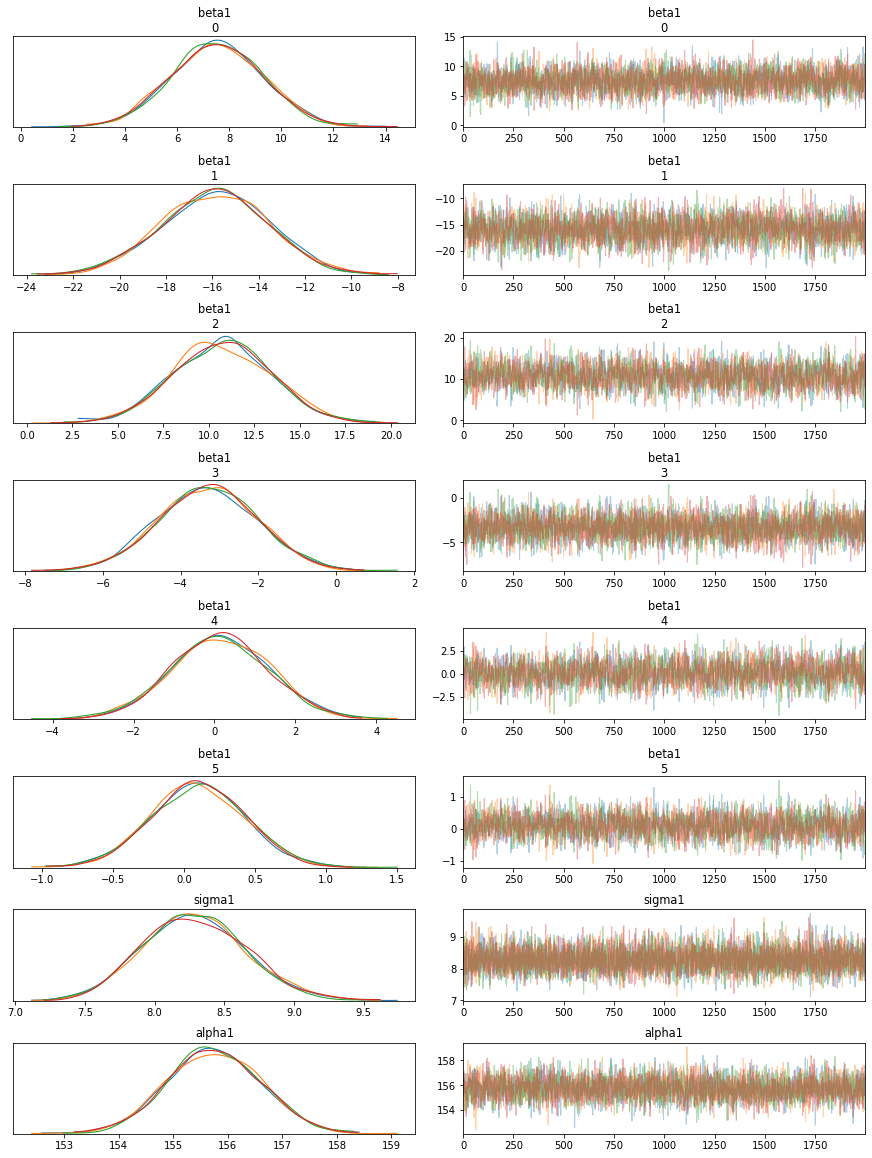

In [50]:
model16 = pm.Model()

with model16 : 
    sigma = pm.HalfCauchy('sigma1', beta = 10, testval = sigma_start)
    alpha = pm.Normal('alpha1', mu = 140, sigma = 10, testval = alpha_start)
    beta = pm.Normal('beta1', mu = 0, sigma = 5, shape = 6)
    mu = pm.Deterministic('mu1', alpha + beta[0]*df1.age_s + beta[1] * df1.age_s**2 + 
                         beta[2]*df1.age_s**3 + beta[3] * df1.age_s**4 + beta[4] * df1.age_s**5
                         + beta[5] * df1.age_s**6)     
    height = pm.Normal('height1', mu = mu, sigma = sigma, observed = df1['height'])
    trace16 = pm.sample(2000, tune = 1000)
    
az.plot_trace(trace16, varnames) 

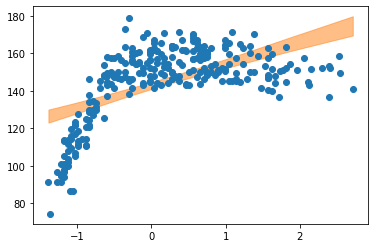

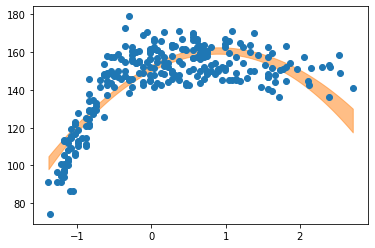

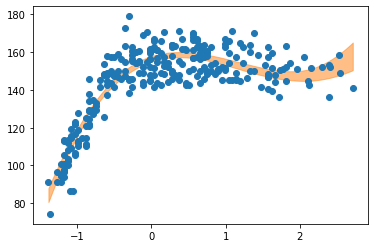

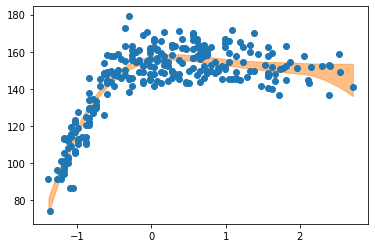

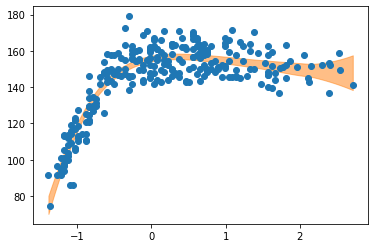

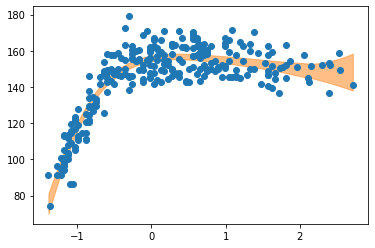

In [56]:
traces = [trace1, trace12, trace13, trace14, trace15, trace16]
for i in range(0, 6) :
    plt.figure() 
    plt.plot(df1.age_s, df1.height, 'C0o')
    az.plot_hpd(df1.age_s, traces[i]['mu1'])

## Compute WAIC values and weights. Plot WAIC comparison. 

In [68]:
compare_models = az.compare({'model1' : trace1,
                             'model12' : trace12, 
                             'model13' : trace13,
                             'model14' : trace14, 
                             'model15' : trace15, 
                             'model16' : trace16}, method='pseudo-BMA')

compare_models

/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/arviz/stats/stats.py:1196: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  kwargs = {"input_core_dims": [["sample"]]}


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model14,0,1924.53,5.57732,0,0.820063,23.7985,0,False,deviance
model15,1,1928.57,6.67402,4.04203,0.108676,24.012,2.54262,True,deviance
model16,2,1929.43,7.46665,4.90169,0.0707063,23.9299,2.9563,True,deviance
model13,3,1939.13,5.40478,14.5947,0.000555441,24.4392,8.86208,True,deviance
model12,4,2060.01,4.94279,135.476,3.1304e-30,24.1397,18.6627,True,deviance
model1,5,2283.17,3.535,358.64,1.08681e-78,23.3414,25.0759,False,deviance


##### in spite of better fit to data, higher order polynomials dont end up being a better OOS fit. 

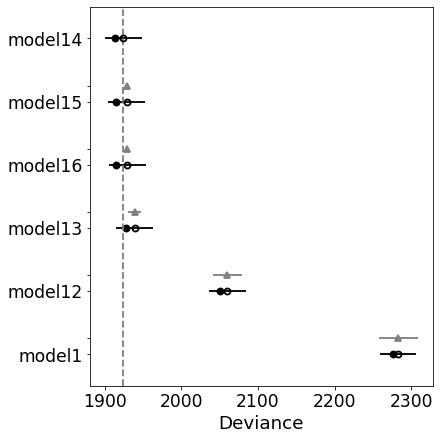

In [69]:
az.plot_compare(compare_models)

In [77]:
data_tab = pd.DataFrame({'model1' : pm.summary(trace1, var_names = varnames)['mean'],
                         'model12' : pm.summary(trace12, var_names = varnames)['mean'],
                         'model13' : pm.summary(trace13, var_names = varnames)['mean'],
                         'model14' : pm.summary(trace14, var_names = varnames)['mean'],
                         'model15' : pm.summary(trace15, var_names = varnames)['mean'],
                         'model16' : pm.summary(trace16, var_names = varnames)['mean']})

data_tab

,model1,model12,model13,model14,model15,model16
alpha1,142.752,151.640,156.486,156.124,155.701,155.740
beta1,11.826,NaN,NaN,NaN,NaN,NaN
beta1[0],NaN,20.498,12.902,7.788,7.845,7.523
beta1[1],NaN,-11.338,-20.397,-17.963,-15.738,-15.905
beta1[2],NaN,NaN,5.848,10.404,9.966,10.695
beta1[3],NaN,NaN,NaN,-2.001,-3.314,-3.314
beta1[4],NaN,NaN,NaN,NaN,0.459,0.125
beta1[5],NaN,NaN,NaN,NaN,NaN,0.094
sigma1,15.986,10.578,8.469,8.245,8.283,8.282


### Compare model estimates. Compute posterior predictive by averaging over model estimates wrt weight

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a52539bd0>],
      dtype=object)

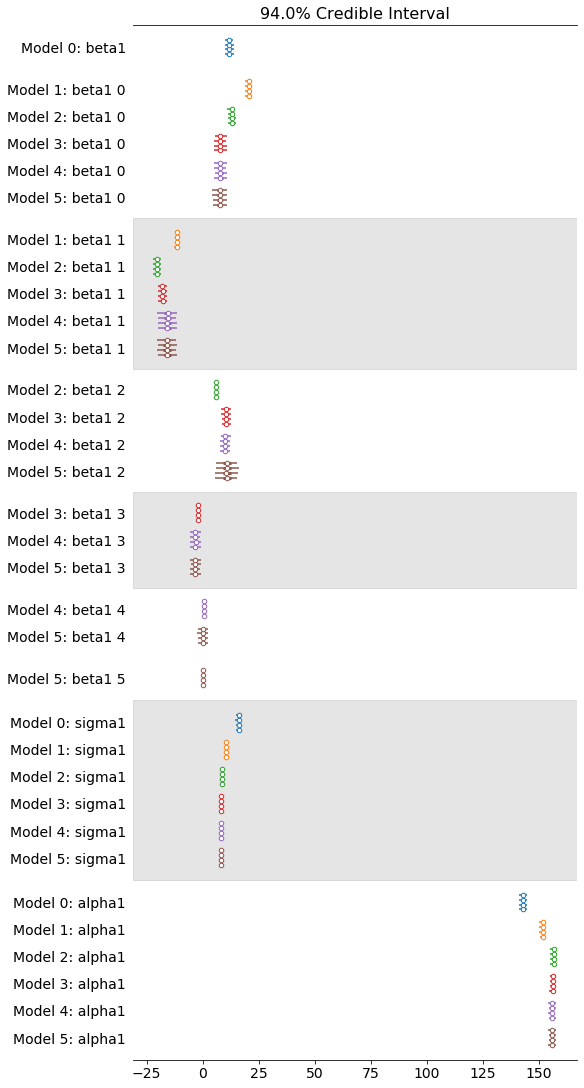

In [110]:
az.plot_forest(traces, var_names = varnames, figsize = (8, 15))

In [118]:
models = [model1, model12, model13, model14, model15, model16]
#remember we have to sort the compare models thing according to model names, hence ascending = True
avg_traces = pm.sample_posterior_predictive_w(traces, 10000, models, 
                                 weights = compare_models.weight.sort_index(ascending = True))

#take some samples from the model with lowest WAIC
model14_traces = pm.sample_posterior_predictive(trace14, 1000, model14) 

100%|██████████| 10000/10000 [00:10<00:00, 960.46it/s]
/opt/anaconda3/envs/pymc36/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [00:01<00:00, 958.33it/s]


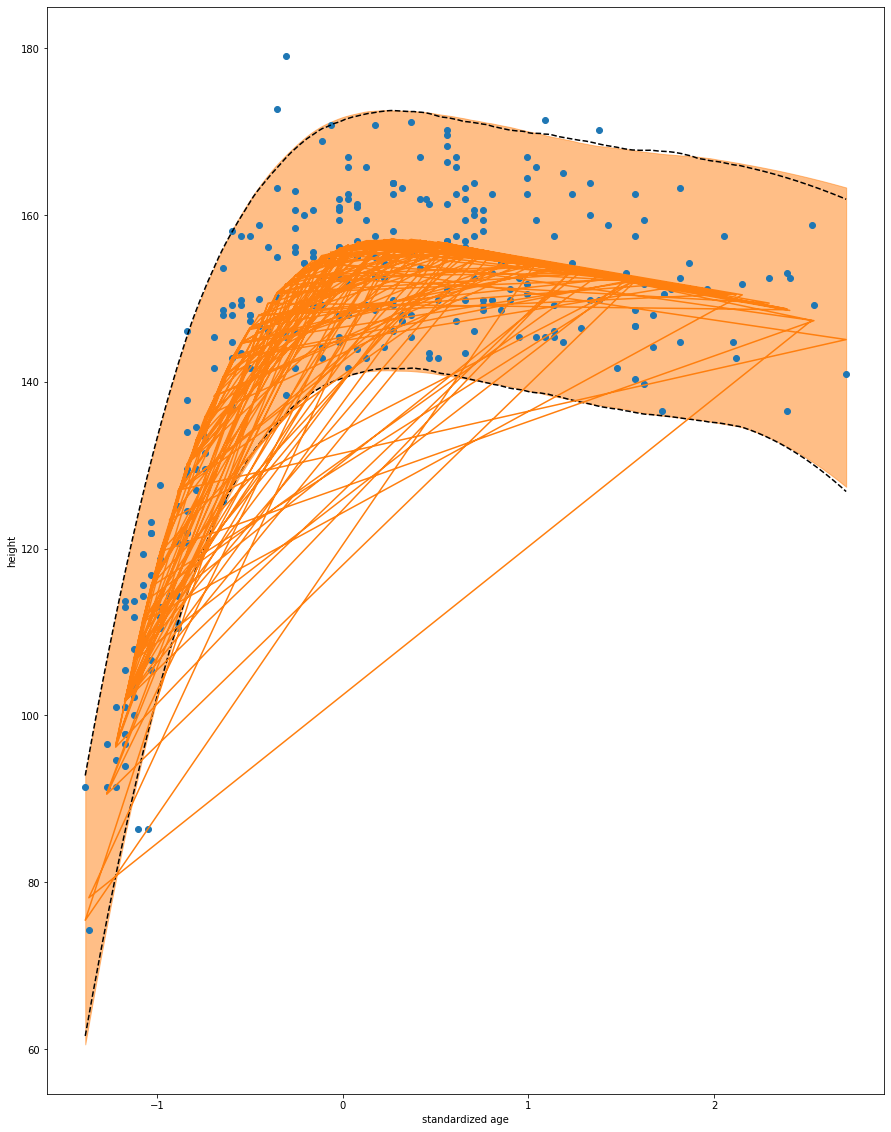

In [138]:
plt.figure(figsize = (15, 20))
plt.plot(df1.age_s, df1.height,'C0o')
az.plot_hpd(df1.age_s, avg_traces['height1'])
plt.xlabel('standardized age')
plt.ylabel('height')

#add in lines to compare the posterior predictive of the model w lowest WAIC to the avg model pred
az.plot_hpd(df1.age_s, model14_traces['height1'], 
           fill_kwargs = {'alpha' : 0 }, 
           plot_kwargs = {'alpha' : 1, 'color' : 'k', 'ls' : '--'})

#add in MAP regression line for averaged posterior predictive
plt.plot(df1.age_s, avg_traces['height1'].mean(0), color = 'C1')
